In [2]:
import networkx as nx
import DynaNet
from Equations import FisherKPPStep as KPP
import numpy as np
from matplotlib import pyplot as plt

# Set exponent of graph size
N = 8

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(3, 3**N-1)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 3.2
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

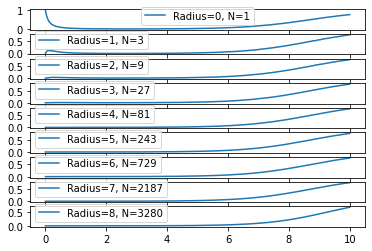

In [3]:
# compute shortest path lengths from our tension source node
spl = nx.shortest_path_length(G, source=0)
spl = np.array([spl[k] for k in range(3**N-1)])

# set up for plotting
fig, axs = plt.subplots(len(set(spl)), 1)

# Iterate through unique radii
for ii in set(spl):
    # mask on radii and sum for total load at radius ii
    loads = np.dot(np.transpose(res.y), spl==ii)/sum(spl==ii)
    axs[ii].plot(res.t, loads, label=f'Radius={ii}, N={sum(spl==ii)}')

    # Plot legends
    axs[ii].legend()

{0, 1, 2, 3, 4, 5, 6, 7, 8}
0
1
4
13
40
121
364
1093
3280


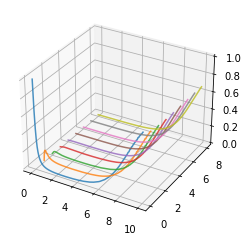

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
print(set(spl))
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res.y[jj, :], zs=ii, zdir='y', alpha=0.8)

0
1
4
13
40
121
364
1093
3280


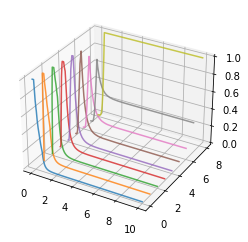

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
u = []

# get w_maxes
for ii in set(spl):
    u.append(np.argwhere(spl==ii)[0][0])

res1 = res.y[u, :]
weights = 3**(np.arange(9))
res1 = res1*weights[:, np.newaxis]
res1 = res1/res1.max(axis=0)
    
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res1[ii, :], zs=ii, zdir='y', alpha=0.8)

Let's try to visualize a slightly smaller network

In [6]:
# Enable interactive plot
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.colors as colors

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99379453e-01
  9.99471350e-01 9.99560824e-01]
 [0.00000000e+00 3.16619029e-02 6.25180928e-02 ... 9.96594226e-01
  9.97096127e-01 9.97585075e-01]
 [0.00000000e+00 3.16619029e-02 6.25180928e-02 ... 9.96594226e-01
  9.97096127e-01 9.97585075e-01]
 ...
 [0.00000000e+00 1.39727904e-09 8.77102337e-09 ... 9.98224748e-01
  9.98486114e-01 9.98740696e-01]
 [0.00000000e+00 1.39727904e-09 8.77102337e-09 ... 9.98224748e-01
  9.98486114e-01 9.98740696e-01]
 [0.00000000e+00 1.39727904e-09 8.77102337e-09 ... 9.98224748e-01
  9.98486114e-01 9.98740696e-01]]


<IPython.core.display.Javascript object>


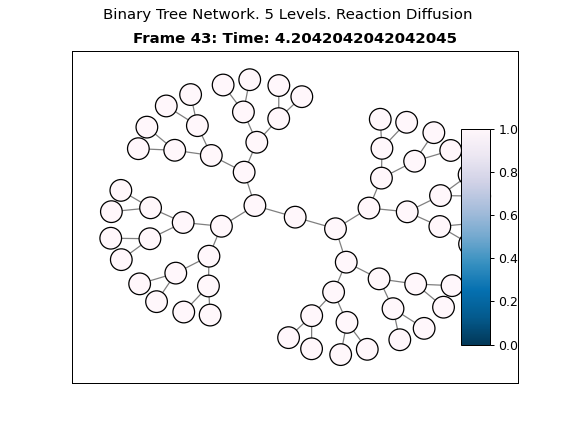

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
from DynaNet import visualize
import importlib
importlib.reload(DynaNet)

# Set exponent of graph size
N = 6

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(2, 2**N-1)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 3.2
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Normalize to max population
res1 = res.y/np.max(res.y, axis=0)

print(res1)
    
# Plot our graph dynamically
fig, update = DynaNet.visualize(np.where(res1>0.5, 1, 0), res.t, adj, 10)
fig.suptitle("Binary Tree Network. 5 Levels. Reaction Diffusion")
ani = animation.FuncAnimation(fig, update, 50, repeat=True, blit=True)
ani.save("HoffmanBinaryTree.gif")

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.98743226e-01
  9.99092356e-01 9.99343723e-01]
 [0.00000000e+00 5.74291730e-06 4.78618913e-05 ... 9.98472390e-01
  9.98897063e-01 9.99202798e-01]
 [0.00000000e+00 1.12620706e-05 9.19151647e-05 ... 9.98498548e-01
  9.98915796e-01 9.99216193e-01]
 ...
 [0.00000000e+00 1.04715425e-03 4.25716199e-03 ... 9.98699553e-01
  9.99060804e-01 9.99320900e-01]
 [0.00000000e+00 5.61331643e-06 4.56915096e-05 ... 9.98644458e-01
  9.99020814e-01 9.99291785e-01]
 [0.00000000e+00 5.78743489e-06 4.86168785e-05 ... 9.98530615e-01
  9.98939048e-01 9.99233095e-01]]


<IPython.core.display.Javascript object>


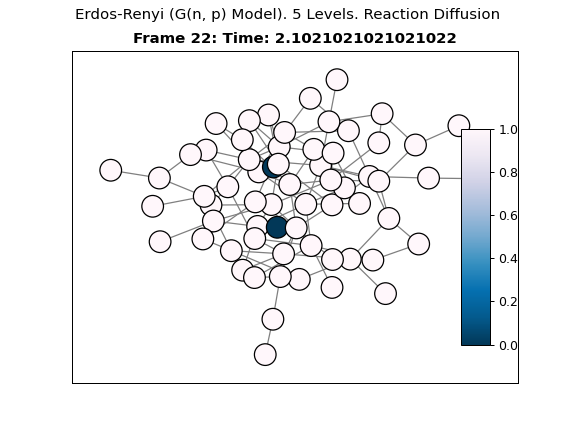

MovieWriter ffmpeg unavailable; using Pillow instead.


In [11]:
from DynaNet import visualize
import importlib
importlib.reload(DynaNet)

# Set exponent of graph size
N = 6

# Note here that 0 is our Root node and will follow special dynamics
G = nx.erdos_renyi_graph(2**N, 0.05)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 3.2
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Normalize to max population
res1 = res.y/np.max(res.y, axis=0)

print(res1)
    
# Plot our graph dynamically
fig, update = DynaNet.visualize(np.where(res1>0.5, 1, 0), res.t, adj, 10)
fig.suptitle("Erdos-Renyi (G(n, p) Model). 5 Levels. Reaction Diffusion")
ani = animation.FuncAnimation(fig, update, 50, repeat=True, blit=True)
ani.save("HoffmanERGraph.gif")

Now, lets produce a few more results from Hoffman and look at our linear spreading speeds. By hunting for solutions of the form $e^{\lambda t - \gamma n}$, we recover a set of conditions for linear spreading speed as

$$
F(s, \gamma, \alpha)=
\begin{pmatrix}
\alpha (e^{\gamma} - k - 1 + ke^{-\gamma}) - s\gamma + 1\\
\alpha (e^{\gamma} - ke^{-\gamma}) -s\\
\end{pmatrix}
$$
We get a linear spreading speed at pinched roots of this function

In [8]:
from scipy.optimize import root
import numpy as np
from matplotlib import pyplot as plt

def get_speed_curve(k):

    def speed_curve(alpha):
        def f(x):
            g, s = x[0], x[1]
            return np.array([alpha*(np.exp(g)-k-1+k*np.exp(-g))-s*g+1, alpha*(np.exp(g)-k*np.exp(-g))-s])
        sol = root(f, np.array([1, 1]))
        return sol.x
    
    return speed_curve

C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


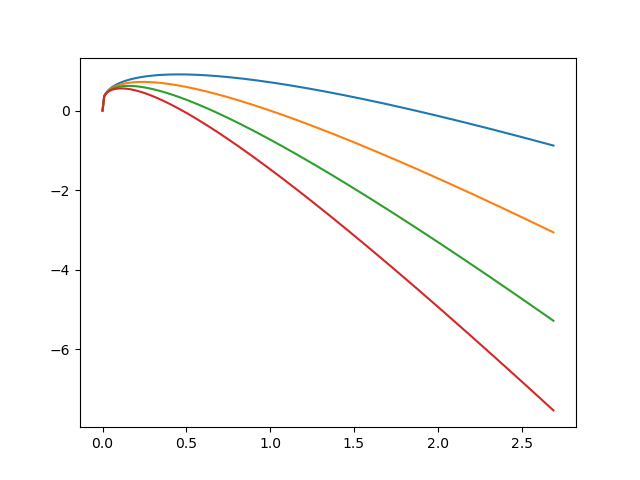

C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # 

In [25]:
for ii in range(3, 7):
    a = np.arange(0, 2.7, 0.01)
    b = np.zeros(len(a))
    speed_curve = get_speed_curve(ii)
    for ii, alpha in enumerate(a):
        b[ii] = speed_curve(alpha)[1]

    plt.plot(a, b)
